<a href="https://colab.research.google.com/github/K-3-LT/defacto_global_bu/blob/main/Training_material_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Library
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Use the read_excel function of pandas
df = pd.read_excel('/content/drive/Shareddrives/Capstone - deFacto Global/Data Scraping/Scraped Data.xlsx', sheet_name='Sheet1', engine='openpyxl')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head()

,chapter,text
0,Welcome To deFacto Training !,Welcome To deFacto Training !\nThank you for c...
1,General Information,deFacto Planning is a performance management s...
2,deFacto Ribbon,The deFacto ribbon consists of connection info...
3,deFacto Current View,The deFacto Current View is comprised of all t...
4,deFacto Tools,Connection\nConnect/Disconnect – log on/off de...


In [ ]:
# Merge all the texts into one long text
long_text = ' '.join(df['text'])

# Use the word_tokenize function from nltk to tokenize
tokens = word_tokenize(long_text)

# Print out the tokens
print(tokens)

['Welcome', 'To', 'deFacto', 'Training', '!', 'Thank', 'you', 'for', 'choosing', 'deFacto', 'Planning', '–', 'the', 'Smartest', ',', 'Fastest', 'Thinking', 'Corporate', 'Planning', 'Product', '!', 'We', 'welcome', 'you', 'to', 'our', 'training', 'environment', '–', 'the', 'place', 'to', 'learn', 'all', 'the', 'ins', 'and', 'outs', 'of', 'deFacto', 'Planning', '.', 'To', 'begin', ',', 'please', 'enroll', 'in', 'this', 'course', '.', 'Once', 'you', 'are', 'enrolled', ',', 'you', 'will', 'be', 'given', 'a', 'voucher', 'code', 'from', 'your', 'training', 'instructor', '.', 'This', 'can', 'be', 'entered', 'in', 'My', 'Dashboard', '>', 'Enter', 'Voucher', ',', 'to', 'gain', 'access', 'to', 'your', 'membership', 'level', ',', 'and', 'the', 'courses', 'associated', 'with', 'your', 'membership', '.', 'Please', 'do', 'not', 'hesitate', 'to', 'contact', 'us', 'if', 'you', 'have', 'any', 'questions', ',', 'or', 'need', 'assistance', 'navigating', 'through', 'the', 'lessons', '.', 'Thank', 'you', '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


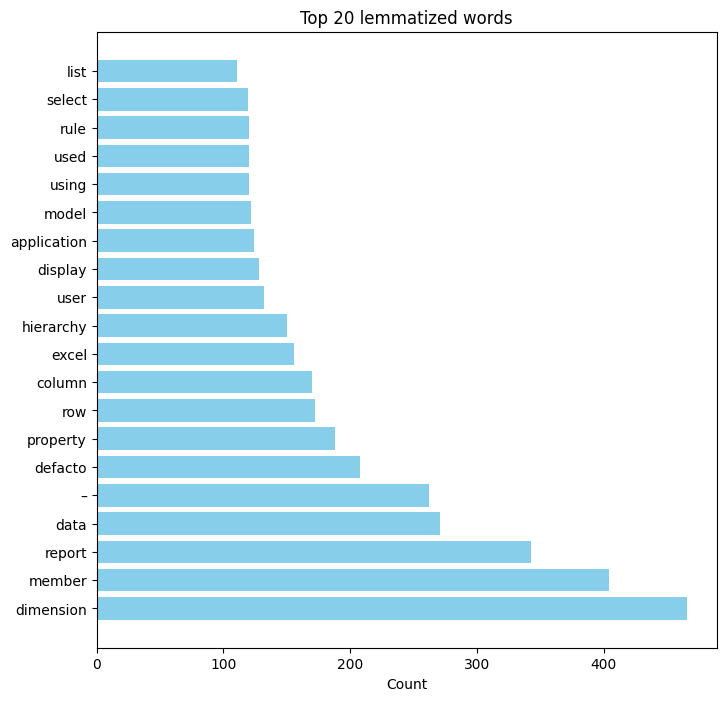

[('dimension', 391), ('report', 291), ('data', 271), ('–', 262), ('member', 228), ('defacto', 208), ('members', 176), ('excel', 156), ('property', 133), ('row', 124), ('hierarchy', 122), ('using', 120), ('used', 120), ('select', 119), ('application', 116), ('column', 109), ('time', 106), ('model', 103), ('list', 103), ('display', 98), ('defined', 94), ('also', 91), ('level', 90), ('name', 90), ('current', 88), ('may', 87), ('example', 85), ('business', 83), ('action', 83), ('type', 79), ('field', 77), ('tab', 77), ('range', 77), ('book', 76), ('dimensions', 75), ('one', 71), ('selected', 71), ('rule', 71), ('set', 70), ('file', 70), ('user', 69), ('must', 69), ('access', 68), ('security', 68), ('view', 66), ('new', 66), ('label', 65), ('use', 64), ('dynamic', 64), ('users', 63)]


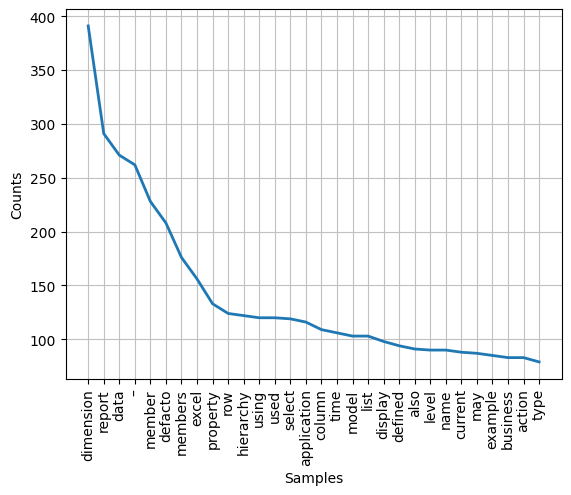

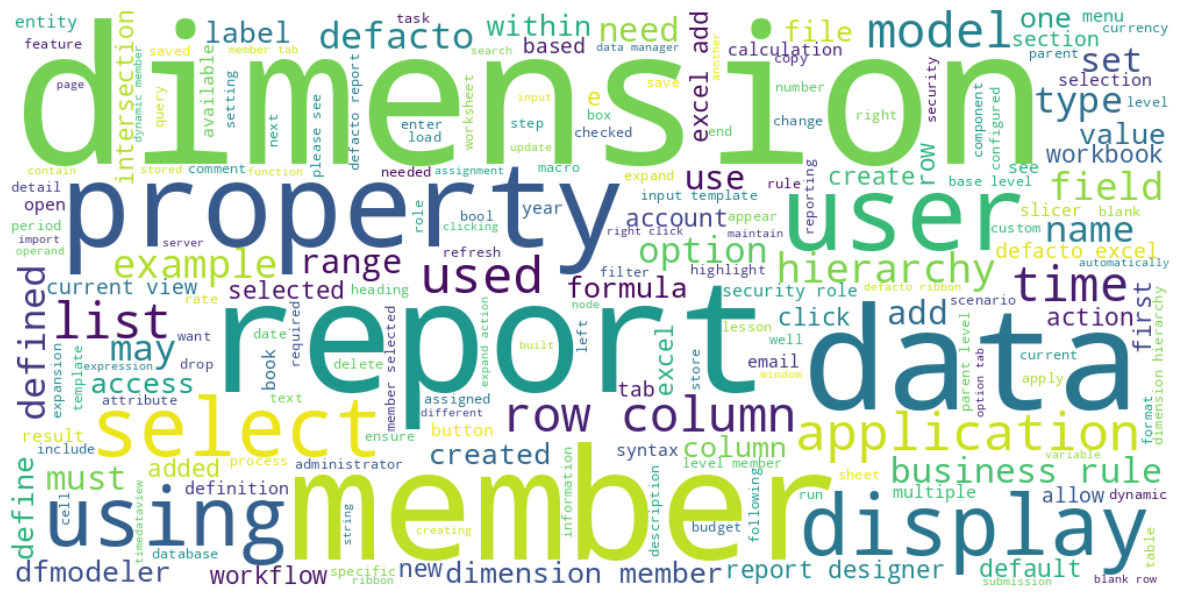

In [ ]:
# Import Library
import string
import matplotlib.pyplot as plt
import numpy as np
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter


# Download the nltk's punkt and stopwords packages
nltk.download(['punkt', 'stopwords', 'wordnet'])

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Get a list of English stop words
stop_words = set(stopwords.words('english'))

# Add English punctuation to stop words
stop_words.update(string.punctuation)

# Use the word_tokenize function from nltk to tokenize and convert it to lowercase
tokens = word_tokenize(long_text.lower())

# Remove stop words from the tokens
filtered_tokens = [token for token in tokens if token not in stop_words]

# Lemmatize the tokens
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Create a counter
counter = Counter(lemmatized_tokens)

# Draw the 20 most common words
most_common_20 = counter.most_common(20)
words, counts = zip(*most_common_20)

plt.figure(figsize=(8,8))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Count')
plt.title('Top 20 lemmatized words')
plt.show()

# Establish Frequency Distribution
fdist = FreqDist(filtered_tokens)

# Print the 50 most common vocabulary words
print(fdist.most_common(50))


# Draw frequency distribution
fdist.plot(30, cumulative=False)
plt.show()

# Create word cloud
lemmatized_text = ' '.join(lemmatized_tokens)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(lemmatized_text)

# Draw word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
